# Palmer Penguins exploration and text repel in Matplotlib

This page showcases the work of [Tuo Wang](https://tuowang.rbind.io/) made to demonstrate some packages that make the `ggplot2` more beautiful. His original post and code can be found [here](https://tuowang.rbind.io/post/2021-03-25-ggplot2-extensions/). This article has been contributed by [Tomas Capretto](https://twitter.com/CaprettoTomas). Thanks to Tuo for accepting sharinig his work here! 🙏🙏

## Load libraries

Today, we are using matplotlib for the visualization, and the library [`adjustText`](https://github.com/Phlya/adjustText) to automatically adjust the position of labels in the plot. In addition, we import `load_penguins()` from the palmerpenguins library to have access to the popular palmerpenguins dataset, and the `get_first_name()` function from the [`names`](https://github.com/treyhunner/names) library to generate random names.

In [1]:
import matplotlib.pyplot as plt

from adjustText import adjust_text
from names import get_first_name
from palmerpenguins import load_penguins

## Load and prepare data

The data we use today were collected and made available by [Dr. Kristen Gorman](https://www.uaf.edu/cfos/people/faculty/detail/kristen-gorman.php) and the [Palmer Station, Antarctica LTER](https://pal.lternet.edu/), a member of the [Long Term Ecological Research Network](https://lternet.edu/). This dataset was popularized by [Allison Horst](https://www.allisonhorst.com/) in her R package [`palmerpenguins`](https://allisonhorst.github.io/palmerpenguins/) with the goal to offer an alternative to the iris dataset for data exploration and visualization.

In [2]:
penguins = load_penguins()
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


Today's vizualisation does not require much data preparation. The only preparation step is to drop observations with missing values.

In [3]:
penguins = penguins.dropna()

## Plot

We start by defining some constant values that we're going to use throgout our plot.

In [4]:
# Colors
BG_WHITE = "#fbf9f4"
GREY_LIGHT = "#b4aea9"
GREY50 = "#7F7F7F"
GREY30 = "#4d4d4d"
BLUE_DARK = "#1B2838"
BLUE = "#2a475e"
COLORS = ["#386cb0", "#fdb462", "#7fc97f" ]

# A list with the species names
SPECIES = sorted(penguins["species"].unique())

# Horizontal lines
HLINES = [40, 50, 60]

# List of random names
NAMES = [get_first_name() for i in range(len(penguins))]

# The markers we use in the scatterplot
MARKERS = ["o", "^", "s"] # circle, triangle, square

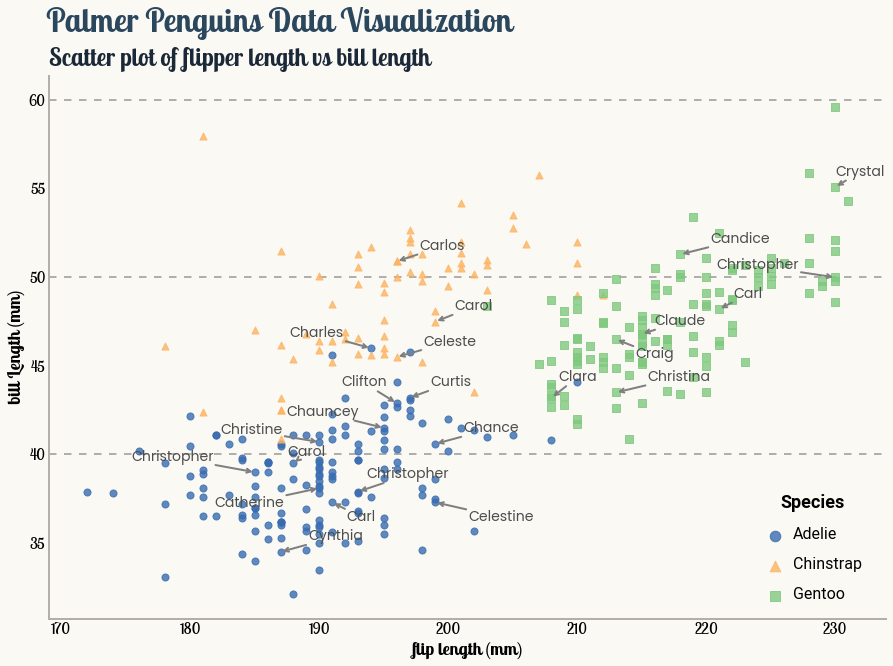

In [8]:
# Initialize layout ----------------------------------------------
fig, ax = plt.subplots(figsize= (15, 10))

# Background color
fig.patch.set_facecolor(BG_WHITE)
ax.set_facecolor(BG_WHITE)

# Horizontal lines in the background
for h in HLINES:
    plt.axhline(h, color=GREY50, ls=(0, (5, 5)), alpha=0.8, zorder=0)

# Add scatterplot  -----------------------------------------------
# We loop through species, colors, and markers.
# Each species receives a different combination of color and marker.
for species, color, marker  in zip(SPECIES, COLORS, MARKERS):
    data = penguins[penguins["species"] == species]
    ax.scatter(
        "flipper_length_mm", "bill_length_mm", s=50, color=color, 
        marker=marker, alpha=0.8, data=data
    )

# Add name labels ------------------------------------------------
# We only add those names that start with the letter "C"
# Each time we add a new text with `ax.text()`, we append its output
# to the `TEXTS` list. This list is passed to `adjust_text()` to 
# repel the labels and add arrows.

TEXTS = []
for i in range(len(penguins)):
    if NAMES[i].startswith("C"):
        x = penguins["flipper_length_mm"].iloc[i]
        y = penguins["bill_length_mm"].iloc[i]
        text = NAMES[i]
        TEXTS.append(ax.text(x, y, text, color=GREY30, fontsize=14, fontname="Poppins"))

# Add title and subtitle -----------------------------------------
# Title
plt.suptitle(
    "Palmer Penguins Data Visualization",
    x = 0.122,
    y = 0.975,
    ha="left",
    fontsize=32,
    fontname="Lobster Two",
    color=BLUE,
    weight="bold",    
)

# Subtitle
ax.set_title(
    "Scatter plot of flipper length vs bill length",
    loc="left",
    ha="left",
    fontsize=24,
    fontname="Lobster Two",
    color=BLUE_DARK,
    weight="bold",
    pad=10
)

# Add legend -----------------------------------------------------

# We store the result of `ax.legend()` for further customizations
legend = ax.legend(
    loc=(0.85, 0.025), # bottom-right
    labelspacing=1.5,  # add space between labels
    markerscale=1.5,   # increase marker size
    frameon=False      # don't put a frame
)

# Iterate through text elements and species names
for text, species in zip(legend.get_texts(), SPECIES):
    text.set_text(species)       # Set species name
    text.set_fontname("Roboto")  # Change default font 
    text.set_fontsize(16)        # Change default font size

# Grab title and customize its appearence.
legend.set_title("Species")
legend_title = legend.get_title()
legend_title.set_fontname("Roboto")
legend_title.set_fontweight("bold")
legend_title.set_fontsize(18)
legend_title.set_ha("left")

# Customize layout -----------------------------------------------
# Hide spines
ax.spines["right"].set_color("none")
ax.spines["top"].set_color("none")

# Customize spines color
ax.spines["left"].set_color(GREY_LIGHT)
ax.spines["left"].set_linewidth(2)
ax.spines["bottom"].set_color(GREY_LIGHT)
ax.spines["bottom"].set_linewidth(2)

# Customize labels and ticks
plt.tick_params(length=0)
plt.yticks(fontname="Lobster Two", fontsize=15)
plt.ylabel("bill Length (mm)", fontname="Lobster Two", fontsize=18, fontweight="bold")

plt.xticks(fontname="Lobster Two", fontsize=15)
plt.xlabel("flip length (mm)", fontname="Lobster Two", fontsize=18, fontweight="bold")

# Adjust text position and add arrows ----------------------------
# 'expand_points' is a tuple with two multipliers by which to expand
# the bounding box of texts when repelling them from points

# 'arrowprops' receives a dictionary with all the properties we want
# for the arrows
adjust_text(
    TEXTS, 
    expand_points=(2, 2),
    arrowprops=dict( # 
        arrowstyle="->", 
        color=GREY50, 
        lw=2
    )
);